## Exercise 1: Computer Visualisation

In [135]:
# Setting up matplotlib
import matplotlib.pyplot as plt 
# Plots inside the notebook
%matplotlib inline 
# Sets the size of the figures:
plt.rcParams["figure.figsize"] = (3,3)

## Numpy and Scikit-Image 
import numpy as np
import skimage 
import skimage.data
import skimage.io 

Greyscale images are represented as 2D-Arrays. Values represent intensitivity levels 
from 0=black to 255=white. We may not see the intensity as well due to irrelevant things such as lighting and shadows. 

In [136]:
# Importing an image:
im = skimage.data.camera() # To read from file: skimage.io.imread("myimage.png")
print(im)
print(im.shape)
print(im.dtype)

[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]
(512, 512)
uint8


Problem with utf8. Utf8 means one byte per pixel (values 0-255). Important is that these values wrap around. 

In [137]:
# Examples of wrap around: 
print(np.array([255],dtype="uint8")+1)
a = np.array([100],dtype="uint8")
print(a, a*2, a*3)

# We can transform them into floats:
a = a/255
print(a)

[0]
[100] [200] [44]
[0.39215686]


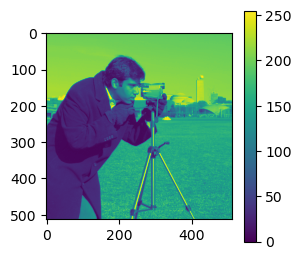

In [138]:
# Displaying Grey Scale images:
# Vmin and Vmax is used to set the colors to map to black and white
plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()


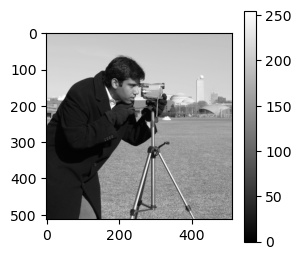

In [139]:
# Setting the colorscale to grey: 
plt.imshow(im, vmin=0, vmax=255, cmap="gray")
plt.colorbar();

Working with Floating Point Numbers: Use a range from (0) black and (255) for white, unless specificed differently. 

float64


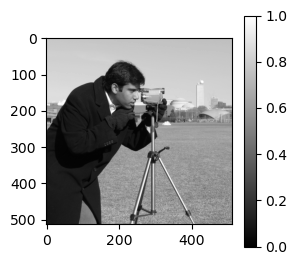

In [140]:
# Converting the image into floating point 
im_float = im/255 # 0 stays 0 and 255 becomes 1
print(im_float.dtype)
plt.imshow(im_float, cmap="gray", vmin=0, vmax=1)
plt.colorbar()

## Geometric Transformations 
1. Stacking transformation
2. Horizontal Stacking
3. Changing the contrast and the Brightness of the image

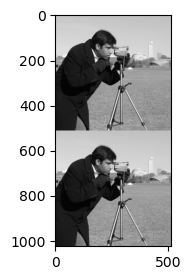

In [141]:
# This takes two copies of the image data im_float and stacks them vertically. 
plt.imshow(np.vstack((im_float, im_float)),
           cmap="gray", vmin=0, vmax=1);

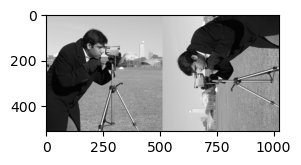

In [142]:
# This takes two times the same image and stacks them horizontally with one image
# being transposed: 
plt.imshow(np.hstack((im_float,im_float.T)), cmap="gray",vmin=0, vmax=1)


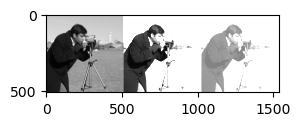

In [143]:
# Changing the contrast and brightness of the image 
plt.imshow(np.hstack((
                im_float,
                im_float * 2,   # changes contrast (Intensity of the image)
                im_float + 0.5  # changes brightness
           )), cmap="gray", vmin=0, vmax=1);

In [144]:
# Using a Slider instead only changing the brightness
import ipywidgets as ipw

@ipw.interact(brightness=ipw.FloatSlider(min=-1,max=+1))
def f(brightness):
    plt.imshow(np.hstack((
                im_float,
                im_float + brightness
           )), cmap="gray", vmin=0, vmax=1);

interactive(children=(FloatSlider(value=0.0, description='brightness', max=1.0, min=-1.0), Output()), _dom_cla…

In [145]:
# Using the slider to change contrast and brightness 
# Centers the image around 0 for contrast adjustment and reajusts, the brightness shifts the image
@ipw.interact(brightness=ipw.FloatSlider(min=-1, max=+1, value=0),
              contrast  =ipw.FloatSlider(min=-1, max=+3, value=1))
def f(brightness,contrast):
    plt.imshow(np.hstack((
        im_float,
        (im_float - 0.5) * contrast + 0.5 + brightness
    )),cmap="gray",vmin=0, vmax=1);

interactive(children=(FloatSlider(value=0.0, description='brightness', max=1.0, min=-1.0), FloatSlider(value=1…

Exercise 1: Read the grayscale image snoopy and write a simple code that generates an image:

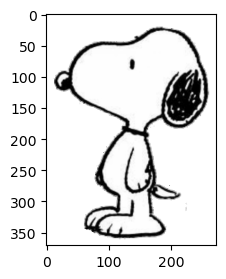

In [146]:
# Snoopy Image:
snoopy = skimage.io.imread("Data/snoopy.png")
plt.imshow(snoopy,cmap="gray",vmin=0,vmax=255)

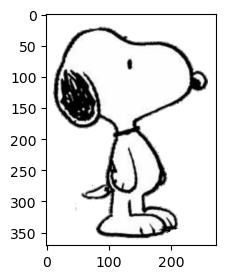

In [147]:
# Snoopy mirrored (Reverse the order of the columns)
plt.imshow(snoopy[:,::-1],cmap="gray",vmin=0,vmax=255)

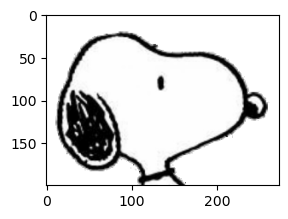

In [148]:
# Mirrored Snoopies head (Choose the first 200 rows and reverse columns)
plt.imshow(snoopy[0:200,::-1],cmap="gray",vmax=255,vmin=0)

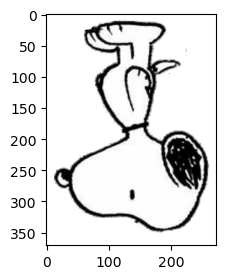

In [149]:
# Snoopy on his head: Reverse the order of the rows:
plt.imshow(snoopy[::-1,:], cmap="gray",vmin=0,vmax=255)

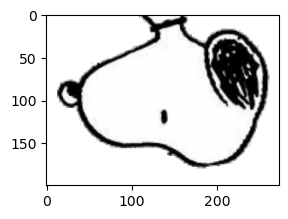

In [150]:
# Snoopies head on his head:
plt.imshow(snoopy[200:0:-1,:],vmax=255,vmin=0,cmap="gray")

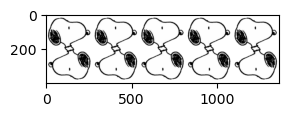

In [151]:
# Solution
im = skimage.io.imread("data/snoopy.png")
ims = []
for i in range(5):
    ims.append(np.vstack((
        im[:200,::-1],
        im[200:0:-1,:]
    )))
plt.imshow(np.hstack(ims),
           vmin=0, vmax=255, cmap="gray")

(371, 273)
uint8
float64


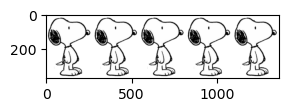

In [152]:
snoopy = skimage.io.imread("Data/snoopy.png")
print(snoopy.shape)
print(snoopy.dtype)
snoopy = snoopy/255
print(snoopy.dtype)
# Select all rows and use the resverse columns:
snoopy_mirrored = snoopy[:, ::-1]
ims = []

plt.imshow(snoopy_mirrored,cmap="gray",vmin=0,vmax=1)
for _ in range(5):
    ims.append(snoopy_mirrored)
# Hstack them 
plt.imshow(np.hstack((ims)),vmin=0, vmax=1, cmap="gray")

float64


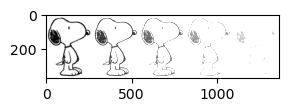

In [153]:
## Disappearing Snoopy
snoopy = skimage.io.imread("Data/snoopy.png")
snoopy = snoopy/255
print(snoopy.dtype)
ims = []

# Changes the brightness of snoopy 
for i in range(5):
    ims.append(snoopy[:,::-1] + i*0.2)
plt.imshow(np.hstack(ims),
           vmin=0, vmax=1, cmap="gray")

Handling Color Images: Are three dimensional numpy arrays (x,y,rgb) 

(400, 600, 3) uint8


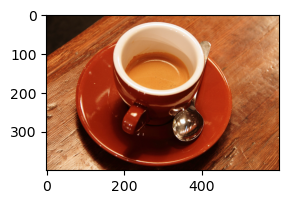

In [154]:
# Loading a Color Image:
import skimage 
import skimage.data
import matplotlib.pyplot as plt 
im = skimage.data.coffee()
print(im.shape, im.dtype) # note third dimension
plt.imshow(im)

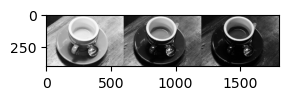

In [155]:
# See the red, green and blue channels of the picture:
red = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]

plt.imshow(np.hstack((
    red,
    green,
    blue)),
           vmin=0, vmax=255, cmap="gray")

In [156]:
# Handling video data 
ims = []
for i in range(1,43):
    ims.append(skimage.io.imread(f"data/video_frames/{i:08d}.png"))
ims = np.array(ims)
print(ims[0].shape)
print(ims.shape)

@ipw.interact(i=ipw.IntSlider(min=0,max=len(ims)-1))
def f(i):
    plt.imshow(ims[i])

(144, 180, 3)
(42, 144, 180, 3)


interactive(children=(IntSlider(value=0, description='i', max=41), Output()), _dom_classes=('widget-interact',…

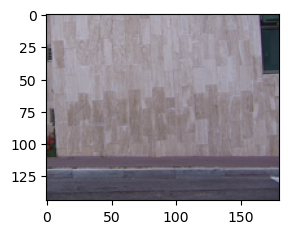

In [157]:
# Take the median of the frames:
# The median of the frames will be clearly the background of the image:
background = np.median(ims, axis=0)
plt.imshow(background.astype("uint8"))

In [158]:
@ipw.interact(i=ipw.IntSlider(min=0,max=len(ims)-1))
def f(i):
    # Here we have to cast to float otherwise the subtraction will have issues with uint8
    difference = ims[i].astype(float)-background.astype(float)
    difference_abs = np.abs(difference)
    # the result has three channels. For every pixel, we have the absolute value of the difference in R,G and B.
    
    difference_sum = np.sum(difference_abs, axis=2)
    # we now have a single channel, i.e. a 2d array
    
    plt.imshow(difference_sum, vmin=0, vmax=80)

interactive(children=(IntSlider(value=0, description='i', max=41), Output()), _dom_classes=('widget-interact',…

## Exercise 2: Binarization & Component Analysis

In [159]:
 # Preparation:
import numpy as np
import skimage
import skimage.data
import skimage.io
import ipywidgets as widgets 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams["figure.figsize"] = (4,4)

(303, 384)


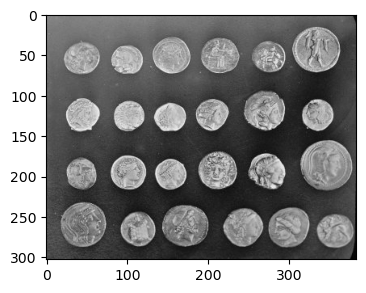

In [160]:
# Read the coin data:
im = skimage.data.coins()
# Transform into a float: 
im = skimage.img_as_float(im)
plt.imshow(im, vmin=0, vmax=1, cmap="gray")
print(im.shape)

We want to create a **binary** image. Either the values are True or false

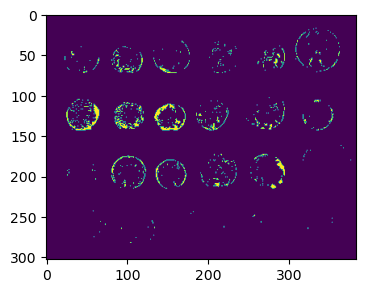

In [161]:
# Creating a binarizaton: Bright pixels = True Dark = False
mask = im > 0.8
plt.imshow(mask)

In [162]:
# Lets find a good threshold for the binarization: (0.5 is ok, however we may still
# not have perfect seperation of coins)
@widgets.interact(threshold = (0,1,0.01))
def f(threshold):
    mask = im > threshold
    plt.imshow(mask)

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

### Connected Component Analysis 
Seperating and analyzing the "island" of *True* pixels in a binary image is called connected component analysis. The label function will give each island its seperate label. 0 = background and the others are the different coins hopefully.

`labels` contains one different number for each "island" of `True` in `mask`, and $0$ for pixels that are `False` in mask.  These islands are called _connected components_.

In [163]:
import skimage.measure
labels = skimage.measure.label(im > 0.5)
print(labels.shape, labels.dtype)
print("Unique values in labels:", np.unique(labels))

(303, 384) int32
Unique values in labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


In [164]:
# We can check the different labels: 
# This function sets the current label to true and everything else to 0:
@widgets.interact(label = list(np.unique(labels)))
def f(label):
    print(f"The connected component with label {label} contains {np.sum(labels == label)} pixels")
    plt.imshow(labels == label)

interactive(children=(Dropdown(description='label', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

The regionprops function can be used to find larger areas:
* `area`: Number of pixels in the region.
* `bbox`: tuple Bounding Box (min_row, min_col, max_row, max_col)
* `centroid`: The center of the connected region (row,col)
* `convex_area`: int
* `label`int the label in the labeled input image

In [165]:
# Finding the large regions:
regions = skimage.measure.regionprops(labels)
large_regions = [r for r in regions if r.area > 100]
print(f"There are {len(large_regions)} large regions")

There are 25 large regions


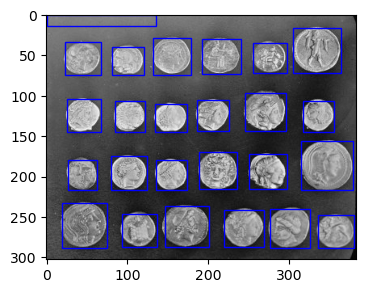

In [166]:
# Drawing the large regions boundaries:
import matplotlib.patches as patches
fig, ax = plt.subplots()
ax.imshow(im, cmap="gray")

for r in large_regions:
    (min_row, min_col, max_row, max_col) = r.bbox
    width = max_col - min_col
    height = max_row - min_row
    rect = patches.Rectangle((min_col,min_row),width,height,
                             linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)
    

In [167]:
# See best solution with different threshold & minsize
threshhold = (0,1,0.01)
minsize = (10,500)

@widgets.interact(threshhold = (0,1,0.01) , minsize = (10,500))
def f(threshhold,minsize):
    labels = skimage.measure.label(im > threshhold)
    regions = skimage.measure.regionprops(labels)
    large_regions = [r for r in regions if r.area > minsize]

    
    fig, ax = plt.subplots()
    ax.imshow(im, cmap="gray")
    
    for r in large_regions:
        (min_row, min_col, max_row, max_col) = r.bbox
        width = max_col - min_col
        height = max_row - min_row
        rect = patches.Rectangle((min_col,min_row),width,height,
                                     linewidth=1,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
    



interactive(children=(FloatSlider(value=0.0, description='threshhold', max=1.0, step=0.01), IntSlider(value=25…

## Write a function, which crops each image and saves it:

In [168]:
threshold = 0.51
minsize = 285
labels = skimage.measure.label(im > threshold)
regions = skimage.measure.regionprops(labels)
large_regions = [r for r in regions if r.area > minsize]

for i,r in enumerate(large_regions):
    (min_row, min_col, max_row, max_col) = r.bbox
    coinim = im[min_row:max_row, min_col:max_col]
    # Convert coinim to uint8 format
    coinim_uint8 = (coinim * 255).astype(np.uint8)
    # fig,ax = plt.subplots()
    # ax.imshow(coinim) Would display 
    # skimage.io.imsave(f"{i:05d}.png",coinim_uint8) Would save

In [169]:
## Try the same with 
# https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Aus_coins_queen_elizabeth_1966.jpg/975px-Aus_coins_queen_elizabeth_1966.jpg


im = skimage.io.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Aus_coins_queen_elizabeth_1966.jpg/975px-Aus_coins_queen_elizabeth_1966.jpg")
im = skimage.img_as_float(skimage.color.rgb2gray(im))

@widgets.interact(threshold = (0,1,0.01), minsize = (10,500))
def f(threshold, minsize):

    # Note LESS THAN (we are looking for dark objects)
    labels = skimage.measure.label(im < threshold) 
    regions = skimage.measure.regionprops(labels)

    fig, ax = plt.subplots()
    ax.imshow(im, cmap="gray")
    
    large_regions = [r for r in regions if r.area > minsize]
    
    for r in large_regions:
        (min_row, min_col, max_row, max_col) = r.bbox
        width = max_col - min_col
        height = max_row - min_row
        rect = patches.Rectangle((min_col,min_row),width,height,
                                 linewidth=1,edgecolor='b',facecolor='none')
        ax.add_patch(rect)


interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0, step=0.01), IntSlider(value=255…

(256, 256)


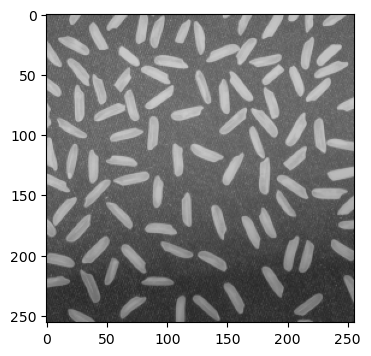

In [170]:
# Write a function to count the number of grains in the picture
# Return the largest and smallest grain size in pixels:

im = skimage.io.imread("https://carmbrustdotcom.files.wordpress.com/2016/10/rice.png")
im = skimage.img_as_float(im)
print(im.shape)
plt.imshow(im, cmap="gray", vmin=0, vmax=1)

Text(0, 0.5, 'minimum image intensity')

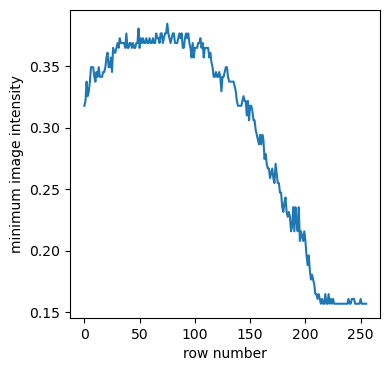

In [171]:
# Shows how the minimum intensity value changes across the rows of the image. 
plt.plot(np.min(im,axis=1))
plt.xlabel("row number")
plt.ylabel("minimum image intensity")

[Text(0.5, 1.0, 'binarized')]

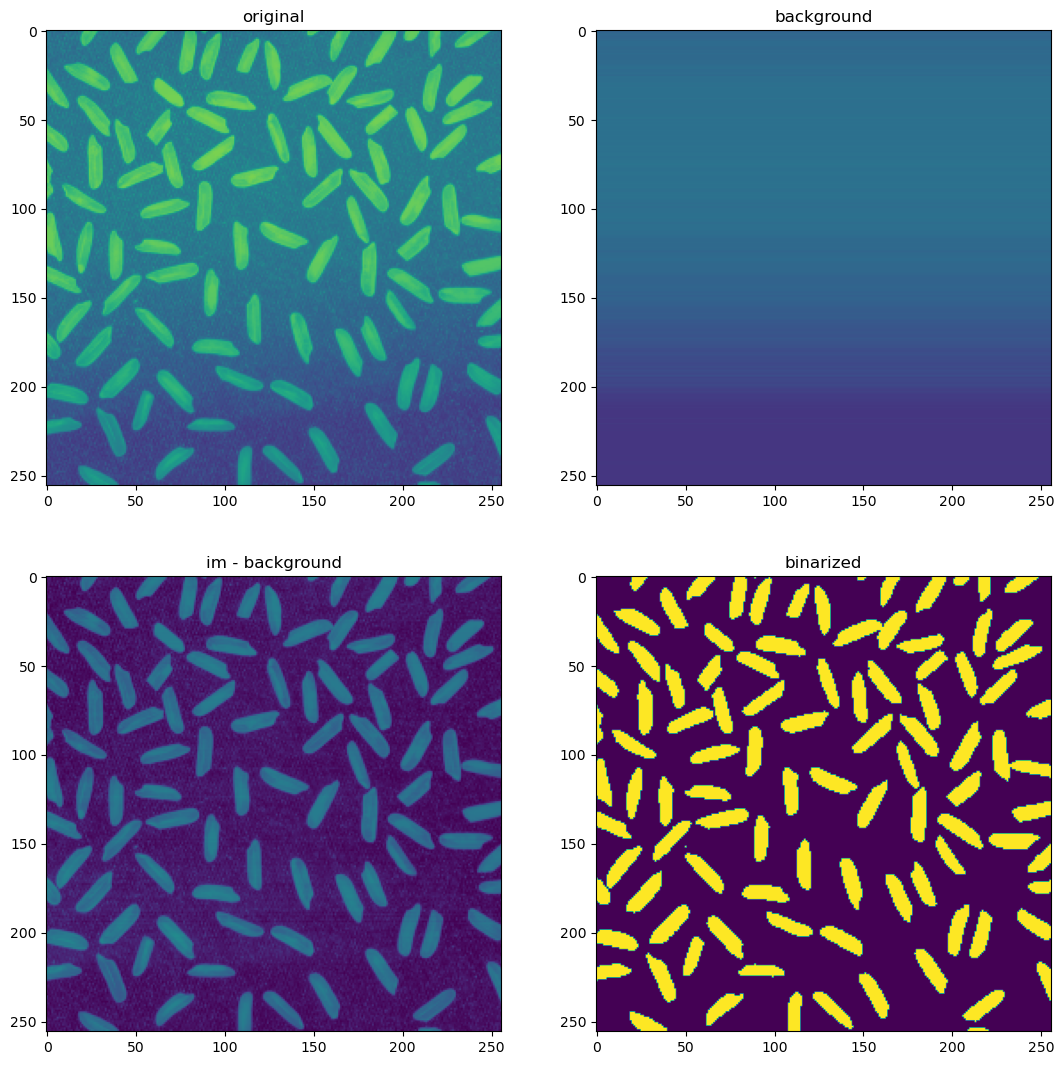

In [172]:
background = (np.min(im,axis=1,keepdims=True) * np.ones((1,im.shape[1])))

fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (13,13))
axs[0,0].imshow(im, vmin=0, vmax=1)
axs[0,0].set(title="original")
axs[0,1].imshow(background, vmin=0, vmax=1)
axs[0,1].set(title="background")
axs[1,0].imshow(im - background, vmin=0, vmax=1)
axs[1,0].set(title="im - background")
mask = (im - background) > 0.25
axs[1,1].imshow(mask, vmin=0, vmax=1)
axs[1,1].set(title="binarized")

97


Text(0, 0.5, 'number of regions')

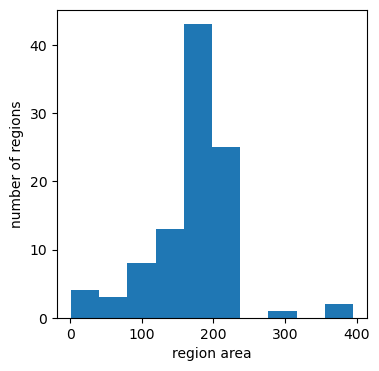

In [173]:
# Shows the areas (how many pixels) and regions with a min amount of area
# We have 97 regions with an area larger than 10 
labels = skimage.measure.label(mask)
rp = skimage.measure.regionprops(labels)
print(len([r for r in rp if r.area > 10]))
areas = [r.area for r in rp]
plt.hist(areas);
plt.xlabel("region area")
plt.ylabel("number of regions")

[1, 4, 5, 6, 8, 9, 10, 32, 39, 40, 69, 71, 77, 90, 99]


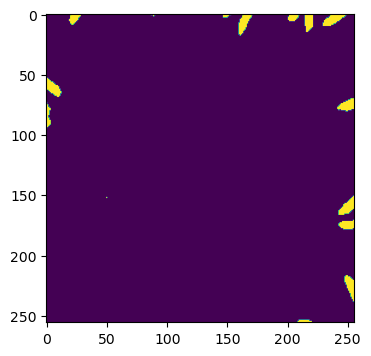

In [174]:
# plot unusually small regions
labels_smallregions = [r.label for r in rp if r.area < 120]
print(labels_smallregions)
plt.imshow(np.isin(labels, labels_smallregions))

[17, 48, 70]


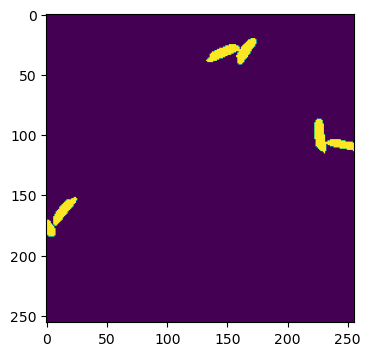

In [175]:
# plot unusually large regions
labels_largeregions = [r.label for r in rp if r.area > 250]
print(labels_largeregions)
plt.imshow(np.isin(labels, labels_largeregions))

## Local Filtering and Edge Detection

In [176]:
# Preparation
import ipywidgets as widgets
import matplotlib.pyplot as plt 
import numpy as np
import skimage
import skimage.io
import skimage.data
%matplotlib inline 
plt.rcParams["figure.figsize"] = (3,3)

(512, 512)
uint8


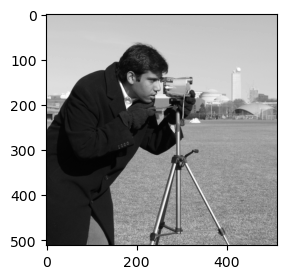

In [177]:
# Load and save greyscale image:
im = skimage.data.camera()
print(im.shape)
print(im.dtype)
plt.imshow(im,cmap="gray")

The value of the output pixel depends on a neighborhood of that pixel in the input image. 
![local filtering animation](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)
We may also use padding to extend it in order to get the same size:
![local filtering animation with same-size padding](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides.gif)

Often, we will use padding on the input image to get an output matrix that is the same size as the input.  Then, there are different options to handle the extra cells.

## Box Filter (Smoothing Filters)
Averages all values in the square 
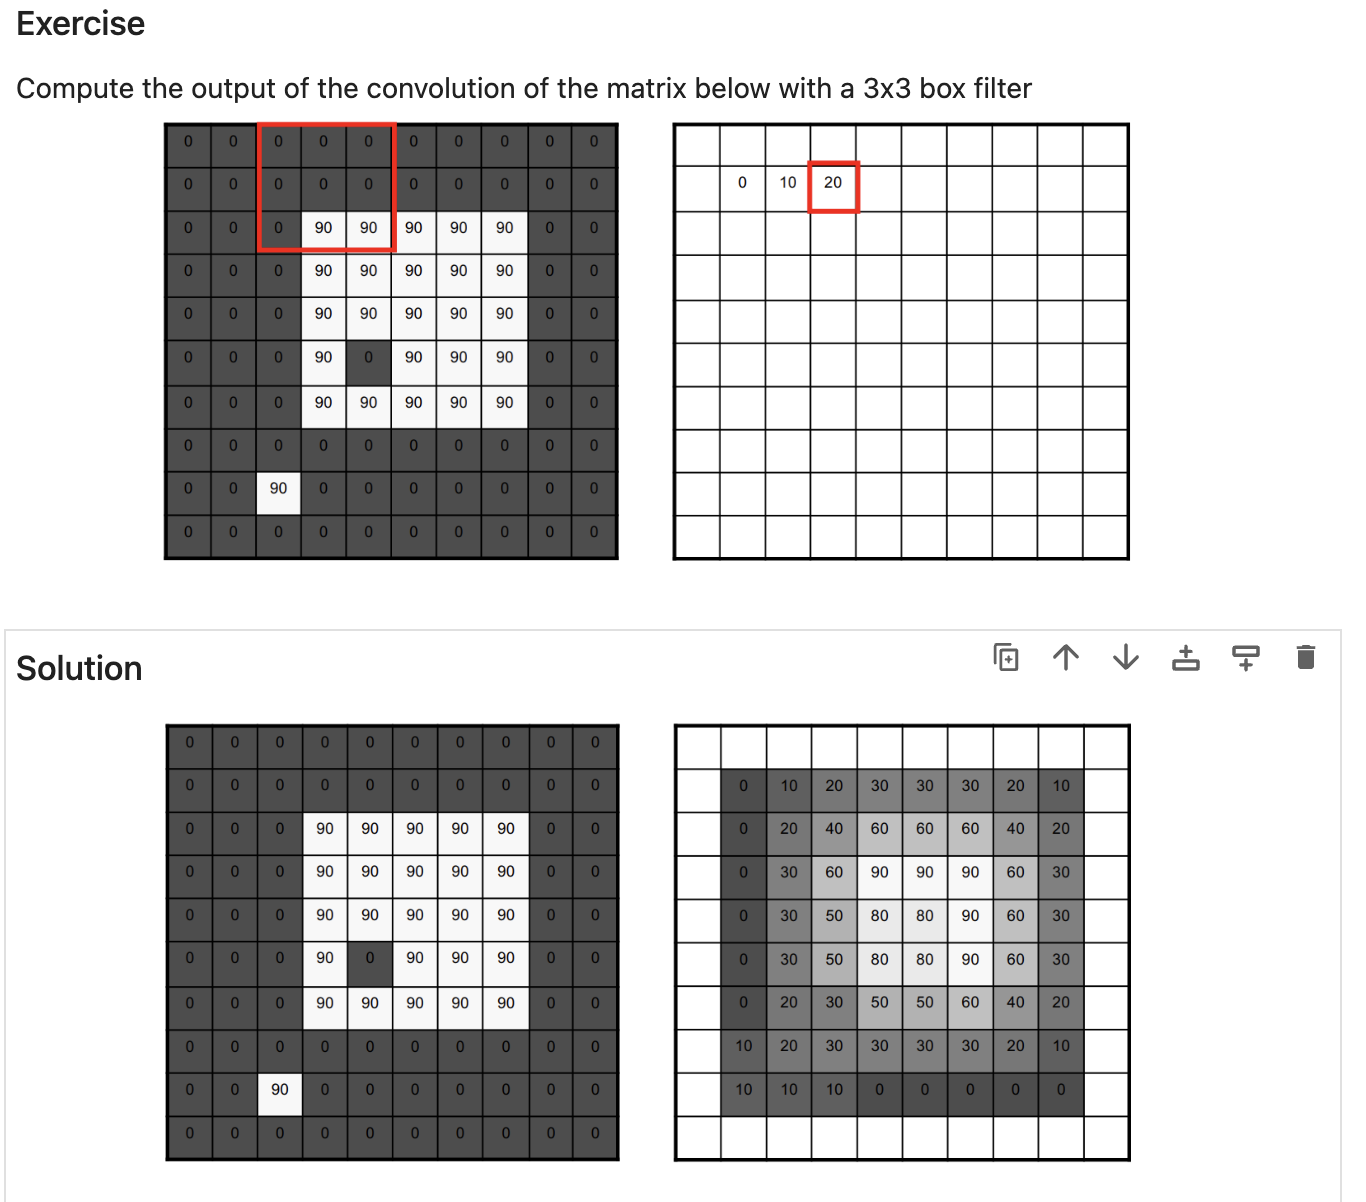

In [186]:
import scipy
# Applies a blur filter by addin
im = skimage.img_as_float(skimage.data.camera())
print(im.shape)
@widgets.interact(sz = (1,21,2))
def f(sz):
    k = np.full((sz, sz), 1/(sz*sz))
    print(k)
    print(k.shape)
    # Check that the sum is close to 0 of the elements in the kernel
    assert(np.isclose(np.sum(k),1.0))
    imf = scipy.ndimage.convolve(im, k[::-1,::-1], mode='constant', cval=0.0)
    print(imf.shape)
    plt.imshow(imf, cmap="gray", vmin=0, vmax=1)

(512, 512)


interactive(children=(IntSlider(value=11, description='sz', max=21, min=1, step=2), Output()), _dom_classes=('…